In [1]:
import pandas as pd
# Cargar datos desde GitHub
github_url = "https://raw.githubusercontent.com/eagz93/PythonMaestria/refs/heads/main/DATOS_EQUIPO_4_PCD.csv"
# Crea el modelo de datos 'df'
df = pd.read_csv(github_url)
df.head()


,ID,Serial Number,Node ID,subpanel_id,imei,Latitude,Longitude,Node Status,service_center,substation,...,kVA Rating,tln,transformer_type,transformerSerialNum,kVA,voltageImbalance,pt_ratio,ct_ratio,transformer_alimentador_835,ambientTemperature
0,7,2423UTMF04187,T63253,835,862754053334131,13.745225,-89.36063,1,NaN,NaN,...,50,T63253,1P Pad,NaN,10.61,NaN,NaN,NaN,NaN,NaN
1,7,2423UTMF04187,T63253,835,862754053334131,13.745225,-89.36063,1,NaN,NaN,...,50,T63253,1P Pad,NaN,11.96,NaN,NaN,NaN,NaN,NaN
2,7,2423UTMF04187,T63253,835,862754053334131,13.745225,-89.36063,1,NaN,NaN,...,50,T63253,1P Pad,NaN,10.11,NaN,NaN,NaN,NaN,NaN
3,7,2423UTMF04187,T63253,835,862754053334131,13.745225,-89.36063,1,NaN,NaN,...,50,T63253,1P Pad,NaN,10.13,NaN,NaN,NaN,NaN,NaN
4,7,2423UTMF04187,T63253,835,862754053334131,13.745225,-89.36063,1,NaN,NaN,...,50,T63253,1P Pad,NaN,11.50,NaN,NaN,NaN,NaN,NaN


In [2]:
#quitan todas las columnas con valores faltantes
df = df.dropna(axis=1, how='all')

In [3]:
   # Dejando solo relevantes
df = df[[
    "ID", "Latitude", "Longitude", "Date",
    "X1 Voltage", "X3 Voltage",
    "X1 Current", "X3 Current", "primaryPhase1CurrentAvg", "primaryPhase3CurrentAvg",
    "X3 Power (kW)", "X1 Power (kW)",
    "line1frequencyPeriodAverage", "line3frequencyPeriodAverage",
    "X1 Energy (kWh)", "X3 Energy (kWh)","Power X1 THD","Power X3 THD","kVA"
]]

In [4]:
# Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [5]:
# Imprimen tipos de datos
print(df.dtypes)

ID                                      int64
Latitude                              float64
Longitude                             float64
Date                           datetime64[ns]
X1 Voltage                            float64
X3 Voltage                            float64
X1 Current                            float64
X3 Current                            float64
primaryPhase1CurrentAvg               float64
primaryPhase3CurrentAvg               float64
X3 Power (kW)                         float64
X1 Power (kW)                         float64
line1frequencyPeriodAverage           float64
line3frequencyPeriodAverage           float64
X1 Energy (kWh)                       float64
X3 Energy (kWh)                       float64
Power X1 THD                          float64
Power X3 THD                          float64
kVA                                   float64
dtype: object


In [6]:
#generan descripciones de los datos
df.describe(include='all')

,ID,Latitude,Longitude,Date,X1 Voltage,X3 Voltage,X1 Current,X3 Current,primaryPhase1CurrentAvg,primaryPhase3CurrentAvg,X3 Power (kW),X1 Power (kW),line1frequencyPeriodAverage,line3frequencyPeriodAverage,X1 Energy (kWh),X3 Energy (kWh),Power X1 THD,Power X3 THD,kVA
count,191068.000000,191068.000000,191068.000000,191068,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000,191068.000000
mean,6.680517,13.746207,-89.361608,2025-02-14 21:15:19.560574976,124.133603,124.299367,63.299490,60.026977,7.697002,7.286667,7700.835833,7290.324858,60.008098,60.008109,9887.192031,9252.872620,0.803351,0.816039,15.319663
min,3.000000,13.745225,-89.362623,2025-01-01 00:00:09,0.200000,0.200000,0.300000,0.200000,0.000000,0.000000,0.000000,0.000000,59.200000,59.000000,2060.900000,1880.000000,0.000000,0.000000,0.000000
25%,3.000000,13.745225,-89.362623,2025-01-23 07:17:46.750000128,123.300000,123.400000,45.900000,40.200000,5.540000,4.840000,5537.000000,4837.000000,60.000000,60.000000,5954.500000,5626.275000,0.453000,0.460000,10.850000
50%,7.000000,13.746678,-89.361575,2025-02-14 20:44:47,124.200000,124.400000,60.200000,54.700000,7.300000,6.640000,7302.000000,6643.000000,60.000000,60.000000,9158.700000,8560.700000,0.857000,0.868000,14.350000
75%,10.000000,13.746715,-89.360630,2025-03-09 09:07:41.750000128,125.100000,125.300000,78.000000,75.800000,9.510000,9.240000,9514.000000,9251.000000,60.000000,60.000000,13141.775000,12071.200000,1.153000,1.170000,19.000000
max,10.000000,13.746715,-89.360630,2025-03-31 23:59:15,129.400000,129.600000,178.200000,200.300000,22.000000,24.890000,22068.000000,25041.000000,60.300000,60.300000,22082.000000,20503.100000,4.545000,3.927000,47.230000
std,2.867983,0.000694,0.000813,NaN,1.427252,1.422632,22.875578,25.491209,2.833006,3.163481,2837.607328,3166.564466,0.027720,0.027769,4848.894528,4590.114264,0.419575,0.429567,5.780882


## Descripción de las Variables del Dataset

El dataset contiene 191,068 registros y 19 columnas. A continuación, se describen las principales variables:

- **ID**: Identificador único del registro.
- **Latitude** y **Longitude**: Coordenadas geográficas donde se tomaron las mediciones.
- **Date**: Fecha y hora de la medición, convertida al formato datetime.
- **X1 Voltage** y **X3 Voltage**: Voltajes medidos en las fases X1 y X3.
- **X1 Current** y **X3 Current**: Corrientes medidas en las fases X1 y X3.
- **primaryPhase1CurrentAvg** y **primaryPhase3CurrentAvg**: Promedio de corriente en las fases primarias 1 y 3.
- **X1 Power (kW)** y **X3 Power (kW)**: Potencia medida en las fases X1 y X3 en kilovatios.
- **line1frequencyPeriodAverage** y **line3frequencyPeriodAverage**: Promedio del período de frecuencia en las líneas 1 y 3.
- **X1 Energy (kWh)** y **X3 Energy (kWh)**: Energía acumulada en las fases X1 y X3 en kilovatios-hora.
- **Power X1 THD** y **Power X3 THD**: Distorsión armónica total de la potencia en las fases X1 y X3.
- **kVA**: Potencia aparente medida en kilovoltio-amperios.

# Análisis Descriptivo y Visualización
En esta sección, realizaremos un análisis descriptivo de los datos limpios y crearemos visualizaciones para entender mejor las distribuciones y relaciones entre las variables.

In [7]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# Configuración general para los gráficos
sns.set(style="whitegrid")

## Histogramas de Variables Numéricas
Visualizamos la distribución de algunas variables clave como Voltaje, Corriente y Potencia.

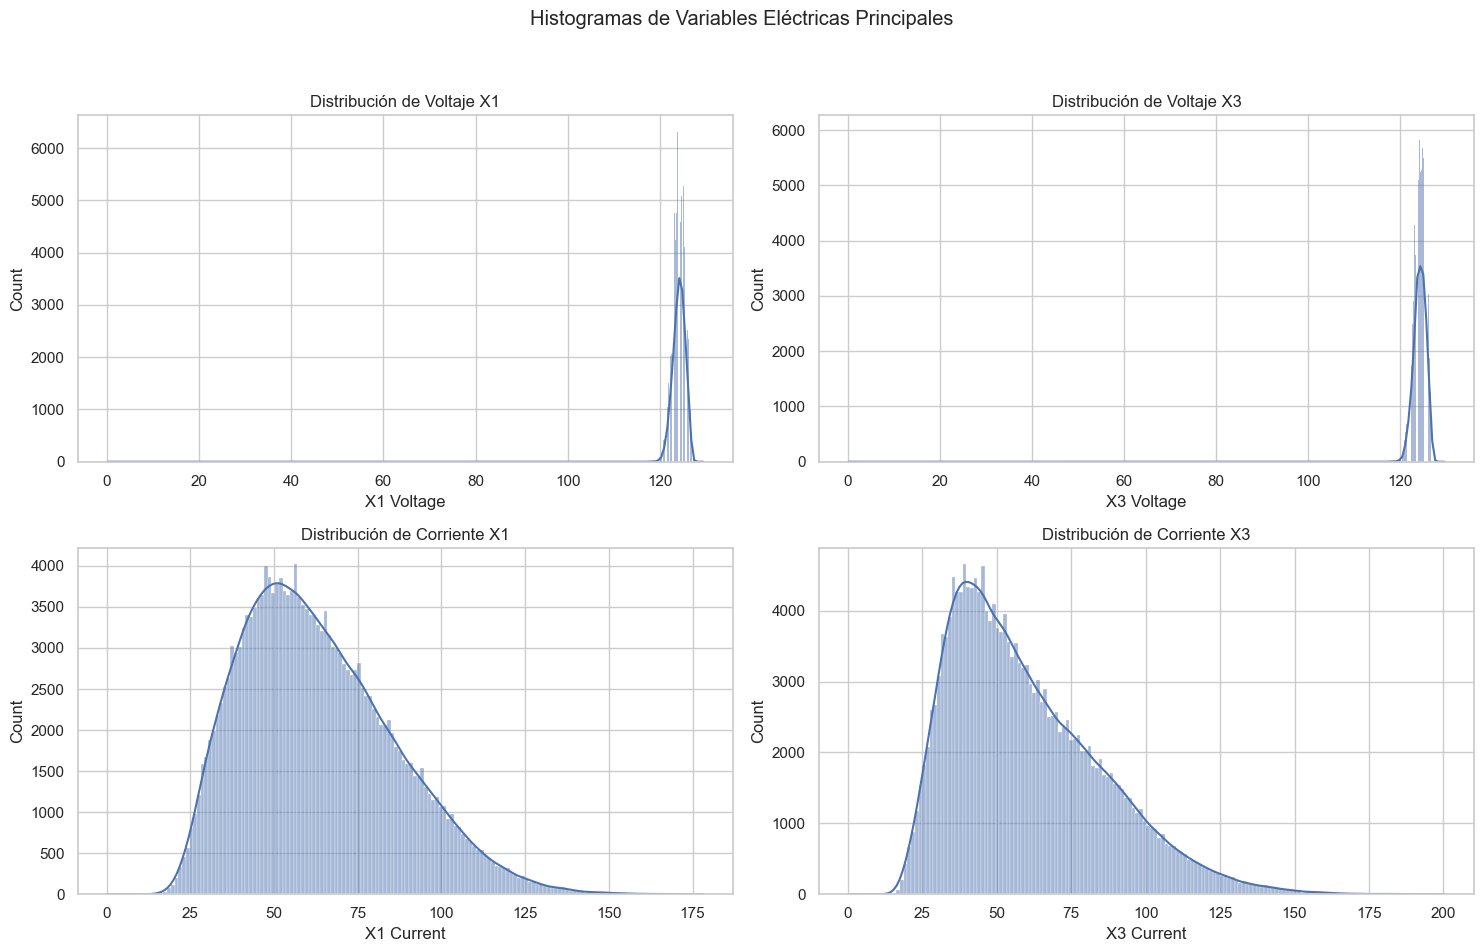

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Histogramas de Variables Eléctricas Principales')

sns.histplot(df['X1 Voltage'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Voltaje X1')

sns.histplot(df['X3 Voltage'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Voltaje X3')

sns.histplot(df['X1 Current'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Corriente X1')

sns.histplot(df['X3 Current'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Corriente X3')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

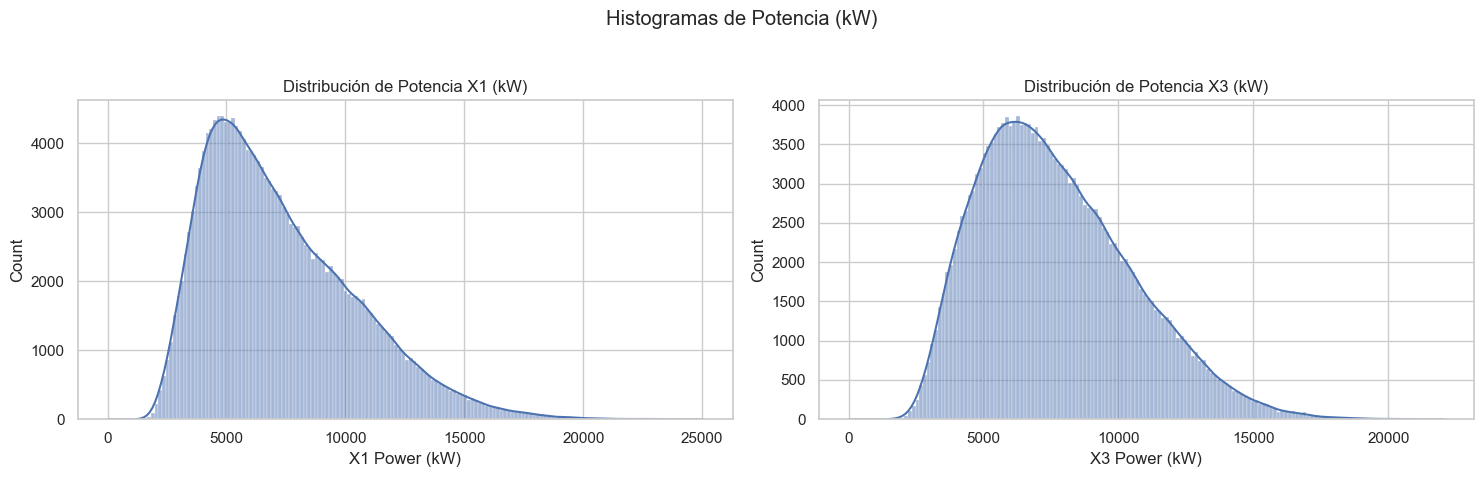

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histogramas de Potencia (kW)')

sns.histplot(df['X1 Power (kW)'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de Potencia X1 (kW)')

sns.histplot(df['X3 Power (kW)'], kde=True, ax=axes[1])
axes[1].set_title('Distribución de Potencia X3 (kW)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Box Plots para Identificar Outliers
Usamos box plots para visualizar la dispersión de los datos y detectar posibles valores atípicos.

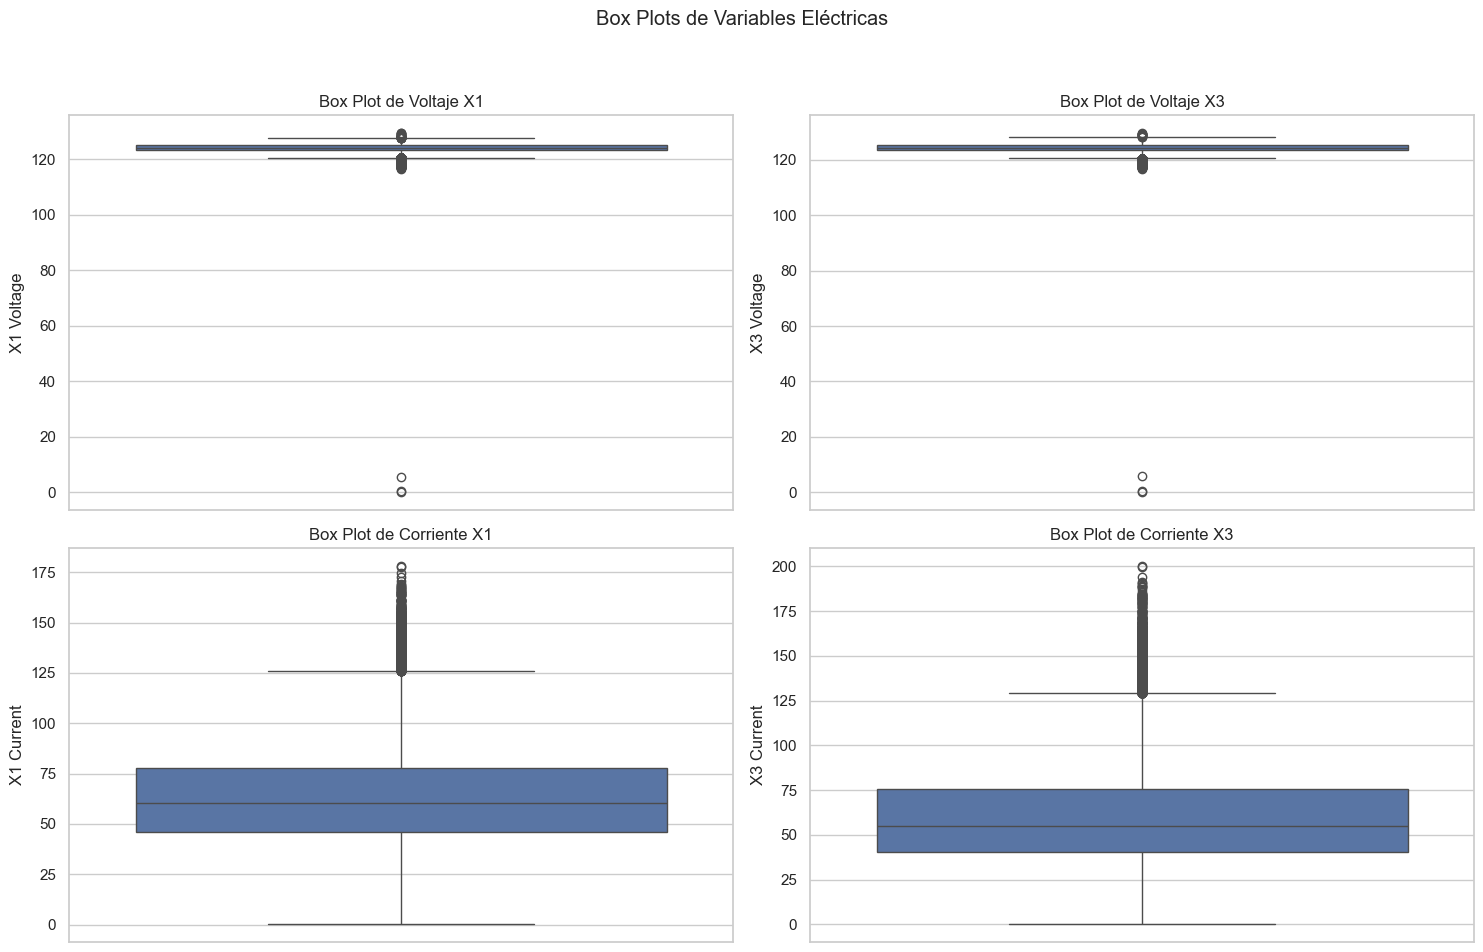

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Box Plots de Variables Eléctricas')

sns.boxplot(y=df['X1 Voltage'], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot de Voltaje X1')

sns.boxplot(y=df['X3 Voltage'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot de Voltaje X3')

sns.boxplot(y=df['X1 Current'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot de Corriente X1')

sns.boxplot(y=df['X3 Current'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot de Corriente X3')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Gráficos de Series Temporales
Visualizamos cómo cambian el voltaje y la corriente a lo largo del tiempo.

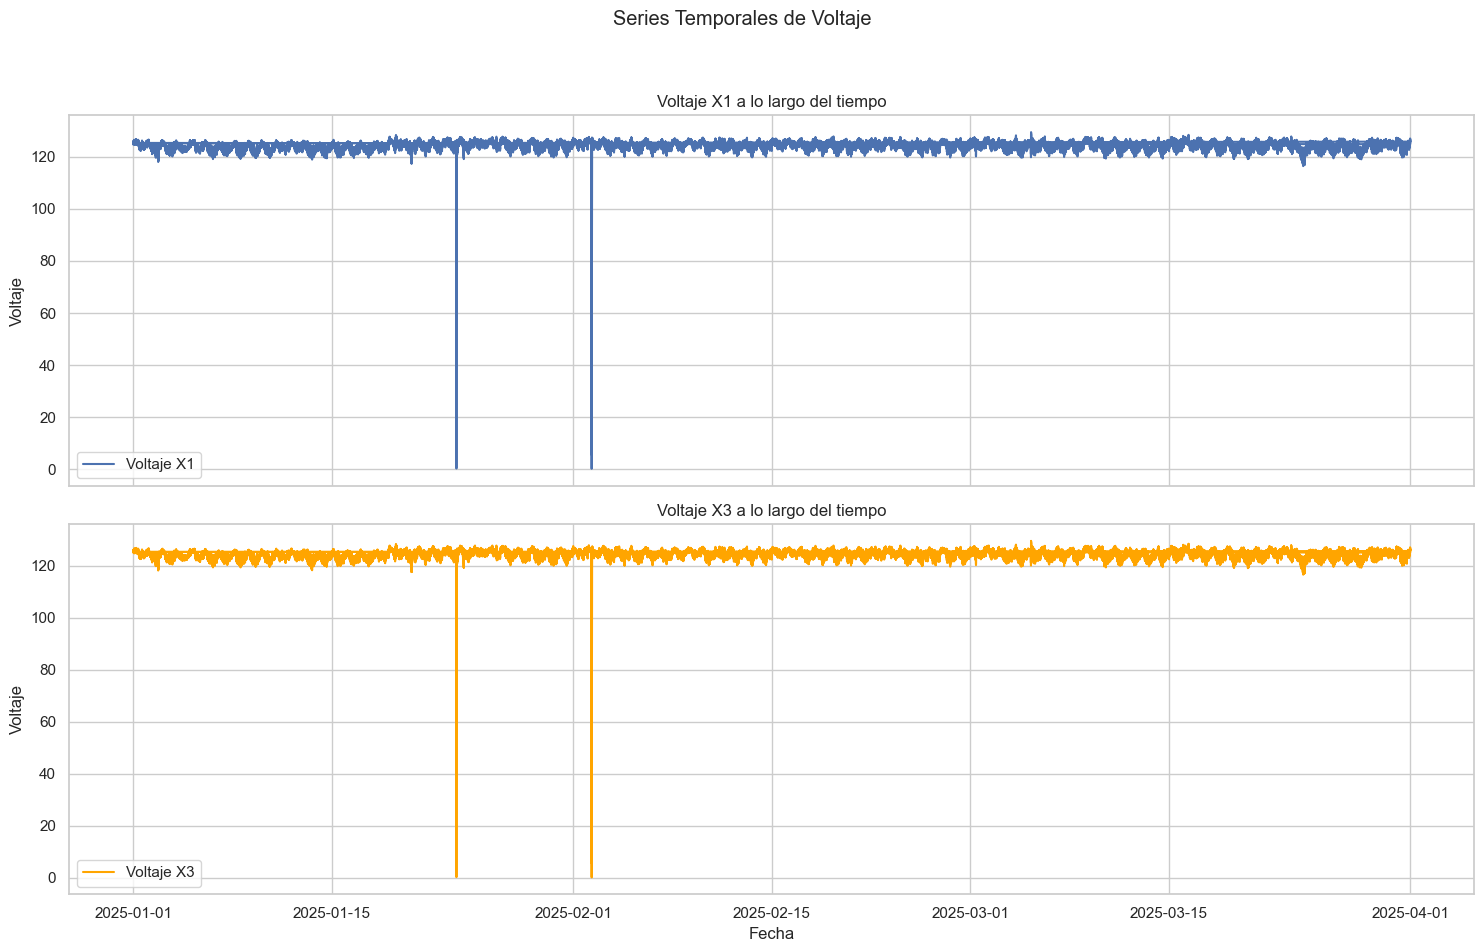

In [17]:
# Asegurarse de que 'Date' es el índice para facilitar el ploteo de series temporales
df_ts = df.set_index('Date')

fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
fig.suptitle('Series Temporales de Voltaje')

axes[0].plot(df_ts.index, df_ts['X1 Voltage'], label='Voltaje X1')
axes[0].set_ylabel('Voltaje')
axes[0].legend()
axes[0].set_title('Voltaje X1 a lo largo del tiempo')

axes[1].plot(df_ts.index, df_ts['X3 Voltage'], label='Voltaje X3', color='orange')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Voltaje')
axes[1].legend()
axes[1].set_title('Voltaje X3 a lo largo del tiempo')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

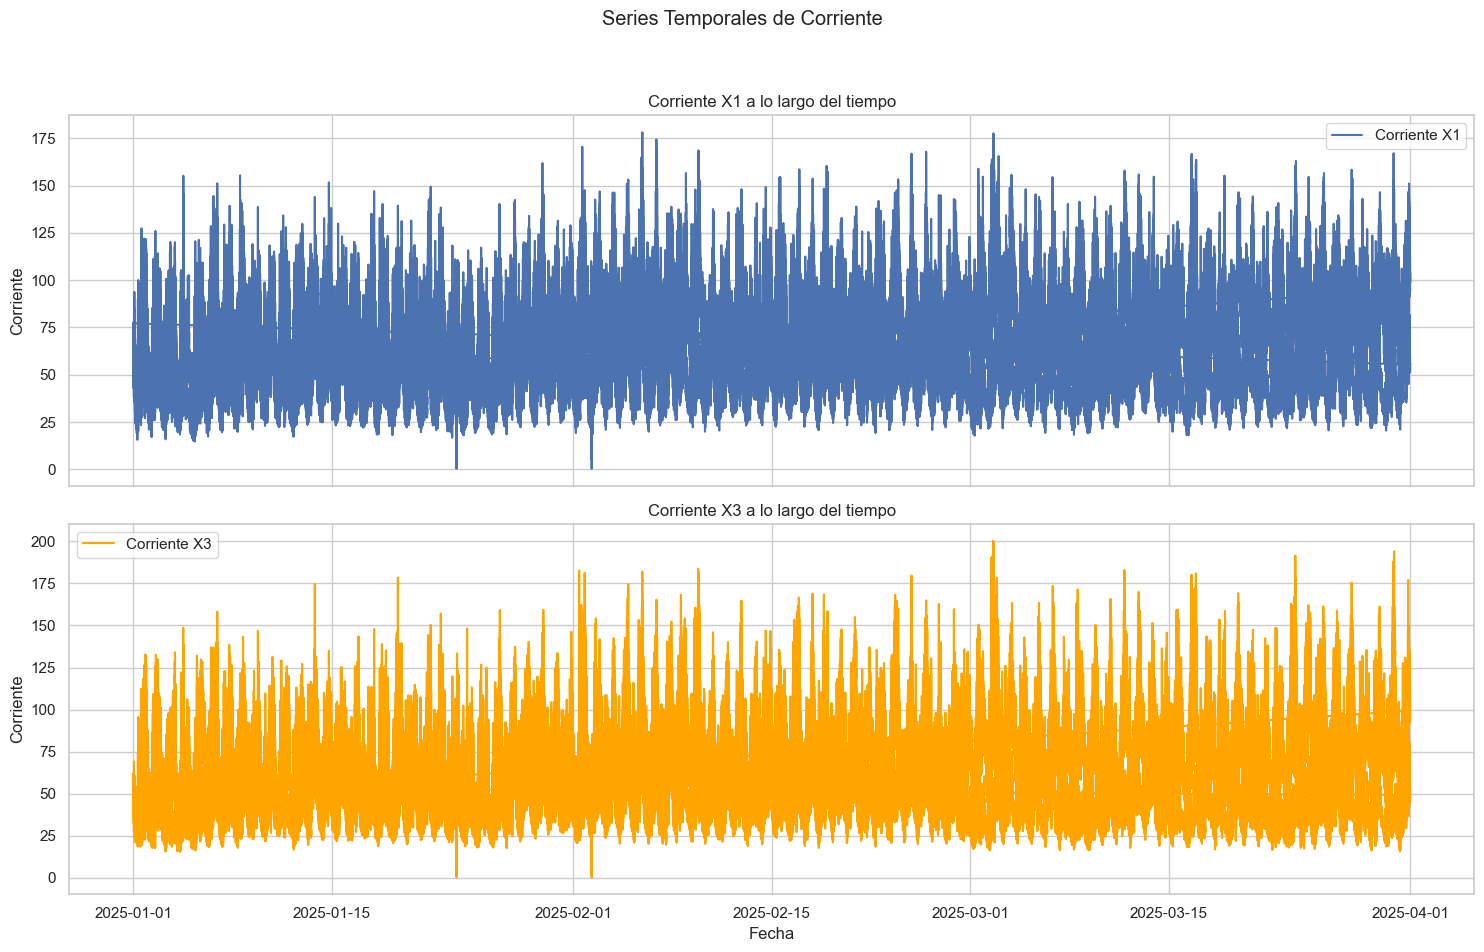

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
fig.suptitle('Series Temporales de Corriente')

axes[0].plot(df_ts.index, df_ts['X1 Current'], label='Corriente X1')
axes[0].set_ylabel('Corriente')
axes[0].legend()
axes[0].set_title('Corriente X1 a lo largo del tiempo')

axes[1].plot(df_ts.index, df_ts['X3 Current'], label='Corriente X3', color='orange')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Corriente')
axes[1].legend()
axes[1].set_title('Corriente X3 a lo largo del tiempo')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

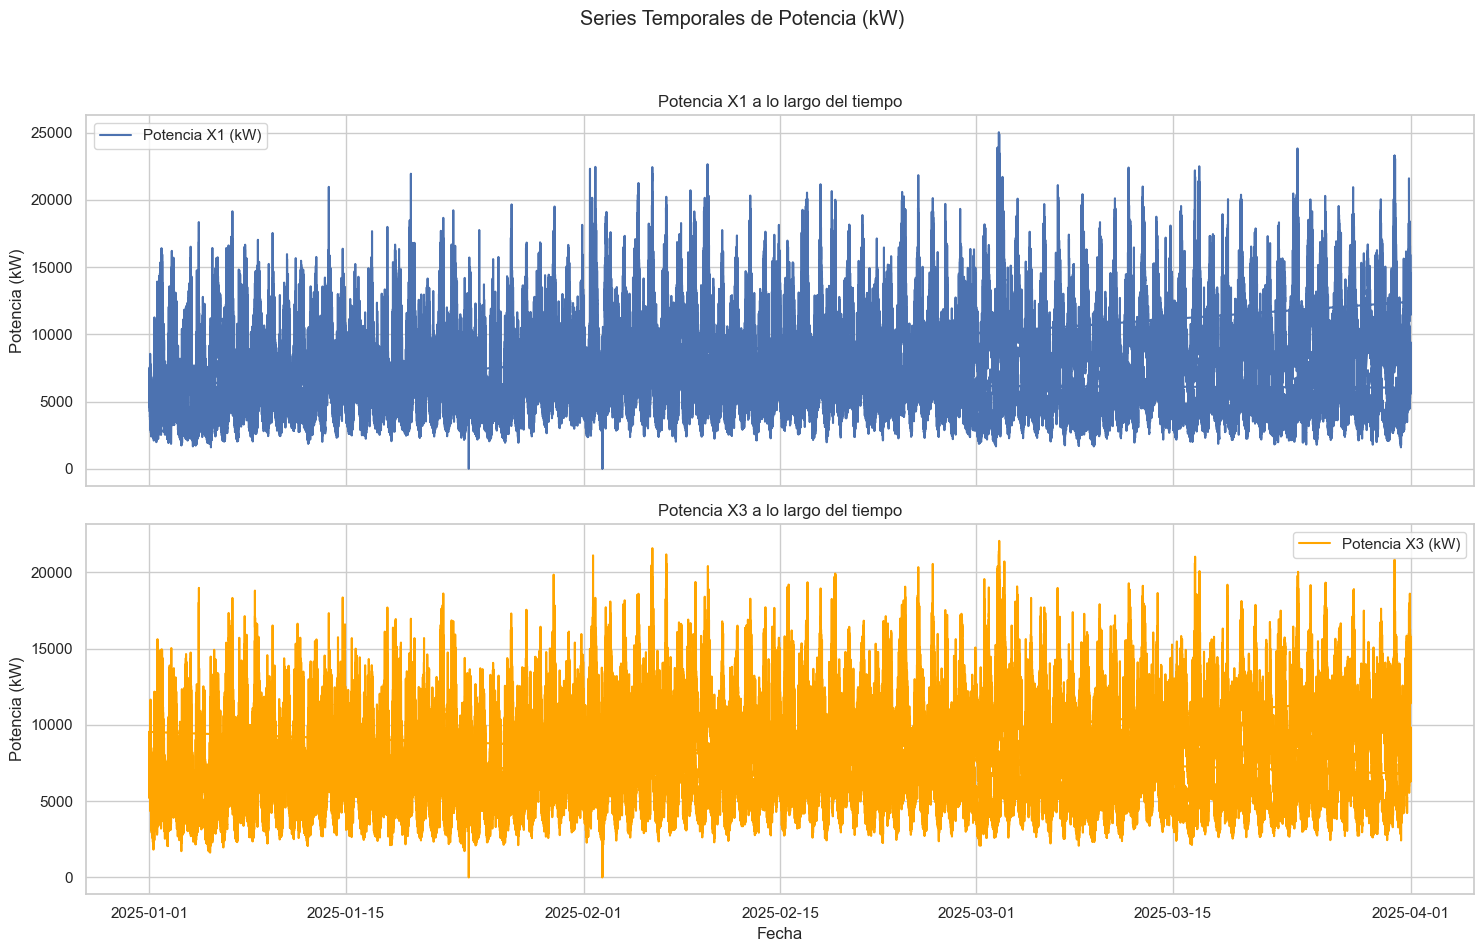

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
fig.suptitle('Series Temporales de Potencia (kW)')

axes[0].plot(df_ts.index, df_ts['X1 Power (kW)'], label='Potencia X1 (kW)')
axes[0].set_ylabel('Potencia (kW)')
axes[0].legend()
axes[0].set_title('Potencia X1 a lo largo del tiempo')

axes[1].plot(df_ts.index, df_ts['X3 Power (kW)'], label='Potencia X3 (kW)', color='orange')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Potencia (kW)')
axes[1].legend()
axes[1].set_title('Potencia X3 a lo largo del tiempo')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

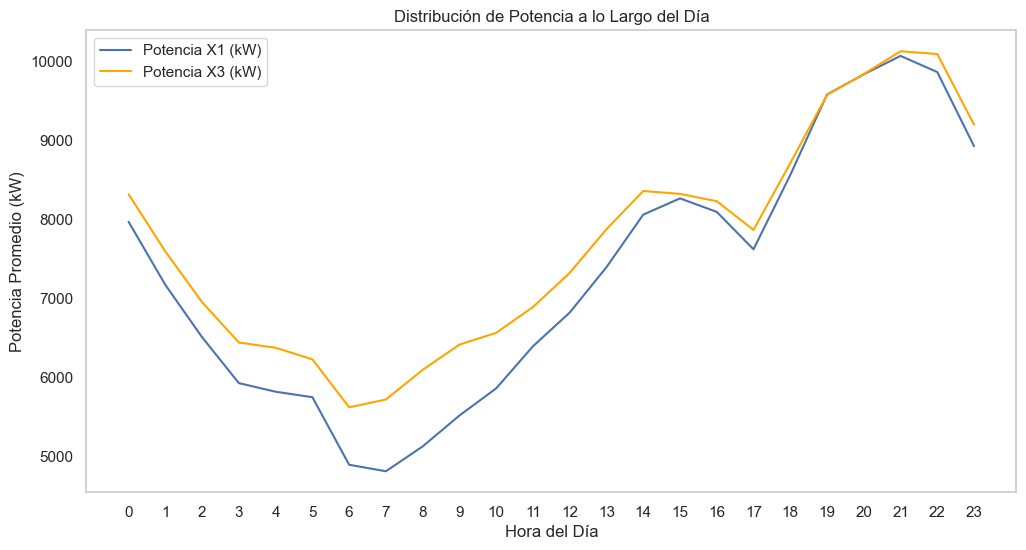

In [20]:
# Extraer la hora de la columna 'Date'
df_ts['Hour'] = df_ts.index.hour

# Calcular la potencia promedio por hora
power_distribution = df_ts.groupby('Hour')[['X1 Power (kW)', 'X3 Power (kW)']].mean()

# Graficar la distribución de potencia a lo largo del día
plt.figure(figsize=(12, 6))
plt.plot(power_distribution.index, power_distribution['X1 Power (kW)'], label='Potencia X1 (kW)')
plt.plot(power_distribution.index, power_distribution['X3 Power (kW)'], label='Potencia X3 (kW)', color='orange')
plt.title('Distribución de Potencia a lo Largo del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Potencia Promedio (kW)')
plt.xticks(range(0, 24))
plt.legend()
plt.grid()
plt.show()